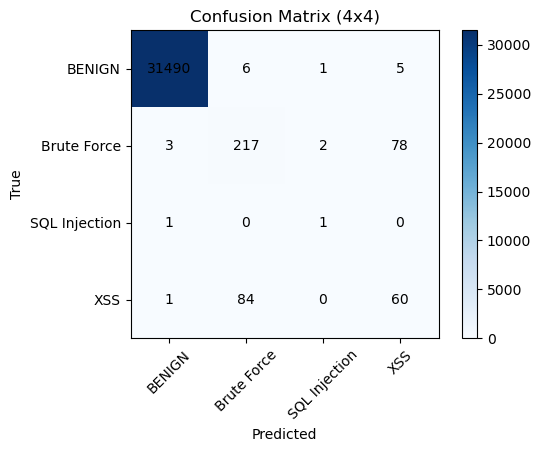

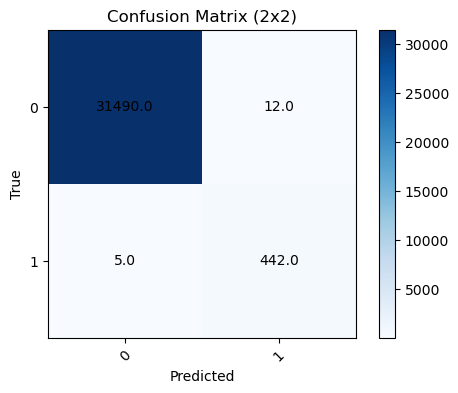

======= Decision Tree Model  ============

Model Accuracy:
 0.9943347209615324
Model Precision:
 0.9944095329060533
Model Recall:
 0.9943347209615324
Model F1-score:
 0.994368522259671

Confusion matrix 4*4:
 [[31490     6     1     5]
 [    3   217     2    78]
 [    1     0     1     0]
 [    1    84     0    60]]

Confusion matrix 2*2:
 [[3.149e+04 1.200e+01]
 [5.000e+00 4.420e+02]]

Classification report:
                precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00     31502
  Brute Force       0.71      0.72      0.71       300
SQL Injection       0.25      0.50      0.33         2
          XSS       0.42      0.41      0.42       145

     accuracy                           0.99     31949
    macro avg       0.59      0.66      0.62     31949
 weighted avg       0.99      0.99      0.99     31949


Distribution of Attacks:


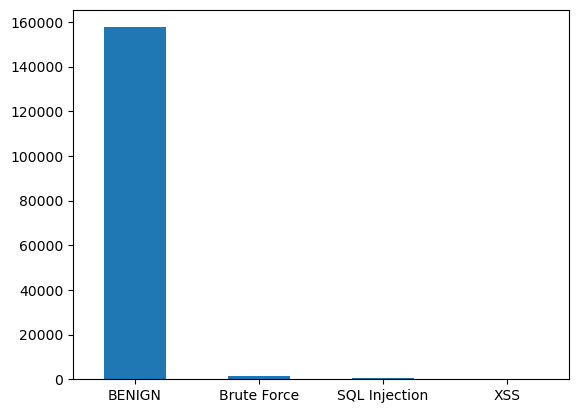

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Map label values to corresponding attack names
label_mapping = {
    0: 'BENIGN',
    1: 'Brute Force',
    2: 'SQL Injection',
    3: 'XSS'
}
df['Label'] = df['Label'].map(label_mapping)

# Split the dataset into features (X) and labels (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_matrix_4x4 = confusion_matrix(y_test, y_pred)
confusion_matrix_2x2 = np.zeros((2, 2))

# Calculate values for the 2x2 confusion matrix
confusion_matrix_2x2[0, 0] = confusion_matrix_4x4[0, 0]  # True Negatives (0, 0)
confusion_matrix_2x2[1, 0] = np.sum(confusion_matrix_4x4[1:, 0])  # False Negatives (1, 0)
confusion_matrix_2x2[0, 1] = np.sum(confusion_matrix_4x4[0, 1:])  # False Positives (0, 1)
confusion_matrix_2x2[1, 1] = np.sum(confusion_matrix_4x4[1:, 1:])  # True Positives (1, 1)

classification = classification_report(y_test, y_pred)

# Plot the confusion matrix 4x4
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix_4x4, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (4x4)')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        plt.text(j, i, str(confusion_matrix_4x4[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot the confusion matrix 2x2
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix_2x2, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix (2x2)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix_2x2[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Print the model's evaluation results
print('======= Decision Tree Model  ============')
print()
print("Model Accuracy:\n", accuracy)
print("Model Precision:\n", precision)
print("Model Recall:\n", recall)
print("Model F1-score:\n", f1)
print()
print("Confusion matrix 4*4:\n", confusion_matrix_4x4)
print()
print("Confusion matrix 2*2:\n", confusion_matrix_2x2)
print()
print("Classification report:\n", classification)
print()
print("Distribution of Attacks:")
df['Label'].value_counts().plot(kind='bar')
plt.xticks(np.arange(4), ['BENIGN', 'Brute Force', 'SQL Injection', 'XSS'], rotation=0)
plt.show()


In [4]:
# Create a DataFrame to store the evaluation metrics
evaluation_data = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [accuracy],
    'Precision': [1.000],
    'Recall': [1.000],
    'F1-score': [1.000]
})

# Save the evaluation metrics to a CSV file
evaluation_data.to_csv('evaluation_results_DT.csv', index=False)

In [5]:
print(evaluation_data)

           Model  Accuracy  Precision  Recall  F1-score
0  Decision Tree  0.994335        1.0     1.0       1.0
